
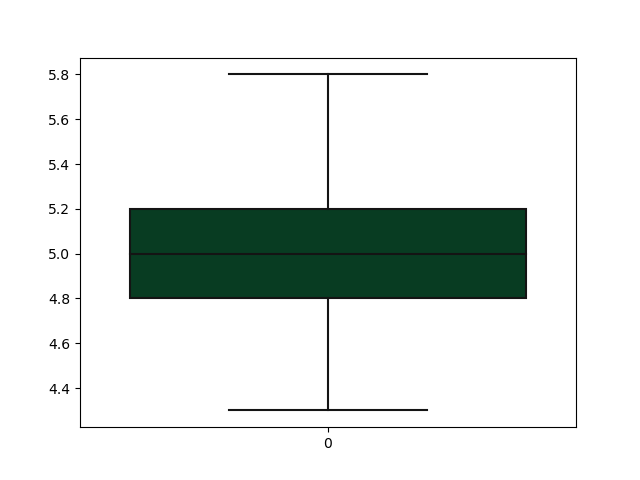
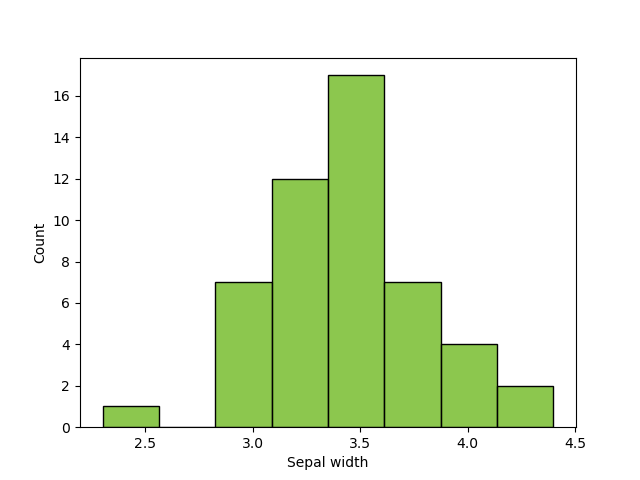

In [1]:
#this project with tie in previous concepts of data management, filtering, visual encoding, color styling, interactivity,
#and dashboarding.

#https://youtu.be/kgdJXN-M3g0 <<<<link to video on this project

#TWEAK the code below to make the following changes:
#1) add a different data source instead of animal and rating, using anything else.  You can either
#     directly type data in or load a dataframe from a csv
#2) add an additional visualisation.  it can be a bar chart, column chart, line chart, anything really.  Do not remove 
#     the existing bar chart.  
#3) conform to a company's marketing / recommended color requirements and share the link to the palette in your code.
#4) submit your homework as a link to your github ipynb page.

import param
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import panel as pn
pn.extension()

# make plots static
%matplotlib inline

# change the dataset to your own data.  it can be ANYTHING, as long as you can make a dashboard from it.
#use different data!

df = pd.read_csv('/data/iris_csv.csv')
df = df.rename(columns={"sepallength": "Sepal length",
                        "sepalwidth": "Sepal width",
                        "petallength": "Petal length",
                        "petalwidth": "Petal width",
                        "class": "Species"})
    
# create a class containing an animal selector drop-down, various plots, and a data table output
class RatingsDashboard(param.Parameterized):
    
    # drop down selector widget containing the list of animals, with the default being 'Goat'
    Species = param.ObjectSelector(default='Iris-setosa', objects=list(df.Species.unique()))
    
    # create data set containing only the data applicable to the animal in the drop down selector
    def get_data(self):
        class_df = df[(df.Species==self.Species)].copy()
        return class_df
    
    # seaborn box plot for the chosen animal
    #Add another visualization!
    #change the color! Find a companies branding website and use their approved HEX code, RGB
    #example of color branding here: https://marketing.illinois.edu/visual-identity/color
    
    # Bayer logo colors, page 18: https://idnet.bayer.com/sites/idnet/files/VBB_BrandGuidelines.pdf
    
    def box_view(self):
        data = self.get_data() 
        ax = sns.boxplot(data['Sepal length'], color='#004422')
        plt.close()
        return ax.figure
    
    def hist_view(self):
        data = self.get_data() 
        ax = sns.histplot(data['Sepal width'], color='#66B512')
        plt.close()
        return ax.figure

    
    # table of data for the chosen animal
    def table_view(self):
        data = self.get_data()
        return data

# create an instance of the class
rd = RatingsDashboard(name='')

# create a title for the dashboard
dashboard_title = 'Iris Sepal Dimensions'

# create some text describing the dashboard
dashboard_desc = "My interactive dashboard using Fisher's Iris data set for displaying sepal lengths by iris species."

# create a dashboard, defining the layout as one column containing the
# dashboard title, dashboard description, 'Animal' drop down selector,
# box plot, and data table
dashboard = pn.Column(dashboard_title, 
                      dashboard_desc,   
                      rd.param,       # 'Species' drop down selector
                      rd.box_view,    # box plot
                      rd.hist_view,    # histogram
                      rd.table_view   # data table
                     )

dashboard.embed(max_opts = 5)